In [1]:
!pip install keras-tuner

In [2]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import keras

In [4]:
import glob

In [5]:
train_files=glob.glob("C:/Users/Anmol/Desktop/Projects/Road to safe/flowers/*/**")

In [6]:
len(train_files)

15740

In [7]:
train_files

['C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\astilbe\\10091895024_a2ea04cda6_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\astilbe\\1033455028_f0c6518ec9_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\astilbe\\10373087134_927b53fb9f_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\astilbe\\1052212431_4963309d03_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\astilbe\\1052219251_d03970e956_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\astilbe\\1052586928_366c5255b8_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\astilbe\\1052587144_34c9f0714c_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\astilbe\\1053073526_188a5b816e_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\astilbe\\1053075100_838051e5b7_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\astilbe\\1053079170_650c3c6af6_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/f

In [8]:
train_files[0]

'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\astilbe\\10091895024_a2ea04cda6_c.jpg'

In [9]:
from random import shuffle
shuffle(train_files)
train_files

['C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\carnation\\12222443475_f6a29cc2d3_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\dandelion\\4041108600_295e1f4464_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\rose\\7403146524_4e1e7d9f99_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\bellflower\\7571141200_8c6863db5b_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\calendula\\23009882050_4e098d35d9_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\bellflower\\3654323715_2a7864fa7c_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\tulip\\13913803336_95dd370bb6_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\california_poppy\\2845882295_70320d8095_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\daffodil\\3352540123_981220e8ab_c.jpg',
 'C:/Users/Anmol/Desktop/Projects/Road to safe/flowers\\common_daisy\\4746315573_7187112ec8_c.jpg',
 'C:/Users/Anmol/Desktop/

In [10]:
print(tf.__version__)

2.9.1


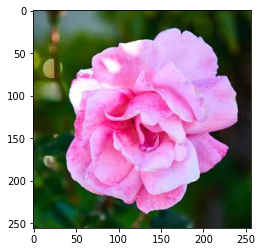

In [11]:
from PIL import Image
img=Image.open(train_files[55])
plt.imshow(img)
# img

In [12]:
Shape=np.array(img).shape

In [13]:
Shape

(256, 256, 3)

In [14]:
img_arr=np.array(img)

In [15]:
img_arr

array([[[ 93, 130, 136],
        [ 93, 130, 136],
        [ 95, 129, 138],
        ...,
        [ 39,  69,   5],
        [ 40,  72,   7],
        [ 41,  73,   6]],

       [[ 93, 130, 136],
        [ 93, 130, 136],
        [ 95, 129, 138],
        ...,
        [ 40,  70,   8],
        [ 41,  73,   8],
        [ 42,  74,   7]],

       [[ 95, 130, 136],
        [ 95, 130, 136],
        [ 95, 129, 138],
        ...,
        [ 40,  70,  10],
        [ 42,  74,   9],
        [ 43,  75,  10]],

       ...,

       [[ 30,  85,  20],
        [ 27,  82,  17],
        [ 23,  78,  13],
        ...,
        [  0,  21,   2],
        [  0,  21,   2],
        [  0,  21,   2]],

       [[ 29,  81,  15],
        [ 26,  78,  12],
        [ 22,  74,   8],
        ...,
        [  0,  21,   2],
        [  0,  20,   3],
        [  0,  20,   3]],

       [[ 29,  80,  13],
        [ 26,  77,  10],
        [ 20,  72,   6],
        ...,
        [  0,  20,   1],
        [  0,  20,   3],
        [  0,  20,   3]]

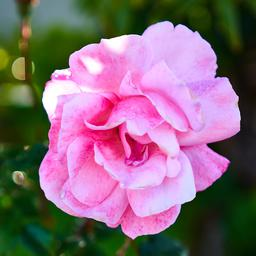

In [16]:
img

In [17]:
count=0
for i,file in enumerate(train_files):
    img = Image.open(file)
    img_arr=np.array(img)
    if(img_arr.shape==Shape):
        count=count+1
    

In [18]:
count

14750

In [19]:
grey_scale=[]
resized_files=[]
i=0;

In [20]:
for items in train_files:
    img=Image.open(items).convert('L')
    img.save('greyscale.jpeg')
    grey_scale.append(img)
    img=grey_scale[i].resize((28,28))
    resized_files.append(img)
    i=i+1

In [48]:
np.array(resized_files[0]).shape

(28, 28, 1)

In [53]:
X_train=np.zeros((len(resized_files),28,28,1))
Y_train=np.zeros((len(train_files),1))
for i, ft in enumerate(resized_files):
    #X_train[i,:,:]=np.array(fi)
    #im=Image.open(ft)
    im_array=np.array(ft)
    if(im_array.shape[0]==28 and im_array.shape[1]==28 and im_array.shape[2]==1):
        X_train[i,:,:,:]=im_array
        #y_train = file[-6]
for i, fis in enumerate(train_files):
    if "astilbe" in fis:
        Y_train[i]=  0
    elif "bellflower" in fis:
        Y_train[i]= 1
    elif "black_eyed_sausan" in fis:
        Y_train[i]=2
    elif "calendula" in fis:
        Y_train[i]=3
    elif "california_poppy" in fis:
        Y_train[i]=4
    elif "carnation" in fis:
        Y_train[i]=5
    elif "common_daisy" in fis:
        Y_train[i]=6
    elif "coreopsis" in fis:
        Y_train[i]=7
    elif "daffodil" in fis:
        Y_train[i]=8
    elif "dandelion" in fis:
        Y_train[i]=9
    elif "iris" in fis:
        Y_train[i]=10
    elif "magnolia" in fis:
        Y_train[i]=11
    elif "rose" in fis:
        Y_train[i]=12
    elif "sunflower" in fis:
        Y_train[i]=13
    elif "tulip" in fis:
        Y_train[i]=14
    elif "water_lily" in fis:
        Y_train[i]=15

In [54]:
Y_train

array([[ 5.],
       [ 9.],
       [12.],
       ...,
       [14.],
       [ 7.],
       [ 9.]])

In [55]:
np.array(len(resized_files)).shape

()

In [52]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [63]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),#min value of filter you want
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),#picks like mcq
        activation='relu',
        input_shape=(28,28,1)
    ),
      #for i in range(0,hp.Int(....)) this will also work
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),# ihave added this line extra in comparison to the old model
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(16, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [64]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [66]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist123Fashion")

In [67]:
tuner_search.search(X_train,Y_train,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 01m 41s]
val_accuracy: 0.11753494292497635

Best val_accuracy So Far: 0.11753494292497635
Total elapsed time: 00h 05m 40s
INFO:tensorflow:Oracle triggered exit
